**Neelkumar Gandhi (22MCB0002)**

**Cancer Dataset to implement the same using Python code (Cleaning, Feature Selection, Feature Elimination, Root node Selection, Model Building and Visualization)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/cancer patient data sets.csv",header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
2,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
3,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
4,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
997,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
998,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
999,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001,...,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001
unique,1001,1001,41,3,9,9,9,9,8,8,...,9,9,9,9,9,10,8,8,8,4
top,index,Patient Id,35,1,6,2,7,7,7,6,...,3,2,2,2,1,2,3,2,2,High
freq,1,1,77,598,326,202,405,365,327,308,...,212,280,243,240,221,240,230,251,300,365


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1001 non-null   object
 1   1       1001 non-null   object
 2   2       1001 non-null   object
 3   3       1001 non-null   object
 4   4       1001 non-null   object
 5   5       1001 non-null   object
 6   6       1001 non-null   object
 7   7       1001 non-null   object
 8   8       1001 non-null   object
 9   9       1001 non-null   object
 10  10      1001 non-null   object
 11  11      1001 non-null   object
 12  12      1001 non-null   object
 13  13      1001 non-null   object
 14  14      1001 non-null   object
 15  15      1001 non-null   object
 16  16      1001 non-null   object
 17  17      1001 non-null   object
 18  18      1001 non-null   object
 19  19      1001 non-null   object
 20  20      1001 non-null   object
 21  21      1001 non-null   object
 22  22      1001 non-null   

# Step 1: Data Cleaning & Preprocessing

In [8]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

**Prework (Make row 0 to as attributes name)**

In [9]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header

In [10]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object', name=0)

In [11]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
2,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
3,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
4,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
5,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
997,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
998,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
999,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [12]:
df.drop(columns = ['index', 'Patient Id'], axis = 1, inplace=True)
df

<ipython-input-12-629468b78320>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['index', 'Patient Id'], axis = 1, inplace=True)


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
2,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
4,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
5,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
997,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
998,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
999,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


**Description of Dataset**

Age The age of the patient. (Numeric)

Gender The gender of the patient. (Categorical)

Air Pollution The level of air pollution exposure of the patient. (Categorical)

Alcohol use The level of alcohol use of the patient. (Categorical)

Dust Allergy The level of dust allergy of the patient. (Categorical)

OccuPational Hazards The level of occupational hazards of the patient. (Categorical)

Genetic Risk The level of genetic risk of the patient. (Categorical)

chronic Lung Disease The level of chronic lung disease of the patient. (Categorical)

Balanced Diet The level of balanced diet of the patient. (Categorical)

Obesity The level of obesity of the patient. (Categorical)

Smoking The level of smoking of the patient. (Categorical)

Passive Smoker The level of passive smoker of the patient. (Categorical)

Chest Pain The level of chest pain of the patient. (Categorical)

Coughing of Blood The level of coughing of blood of the patient. (Categorical)

Fatigue The level of fatigue of the patient. (Categorical)

Weight Loss The level of weight loss of the patient. (Categorical)

Shortness of Breath The level of shortness of breath of the patient. (Categorical)

Wheezing The level of wheezing of the patient. (Categorical)

Swallowing Difficulty The level of swallowing difficulty of the patient. (Categorical)

Clubbing of Finger Nails The level of clubbing of finger nails of the patient. (Categorical)

**Convert column Level(dependent variable) from category to int**

In [13]:
df['Level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [14]:
## Now, apply LabelEncoding for this Level column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Level'] = le.fit_transform(df['Level'])

<ipython-input-14-61e7b0252d75>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Level'] = le.fit_transform(df['Level'])


In [15]:
## for duplicate entries
df = df.drop_duplicates()
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
1,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
2,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
3,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,0
4,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
5,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,35,1,2,1,2,1,2,1,2,3,...,3,4,5,1,3,2,1,2,2,1
978,45,1,3,1,4,3,2,3,4,3,...,3,2,2,4,2,2,3,4,3,1
980,53,1,3,1,4,2,3,2,3,3,...,2,2,3,4,1,5,2,6,2,1
984,26,1,3,2,4,2,3,2,3,3,...,4,5,6,5,5,4,6,5,4,2


In [16]:
df = df.astype(int)

**Visualize the dataset**

<Figure size 3000x2400 with 0 Axes>

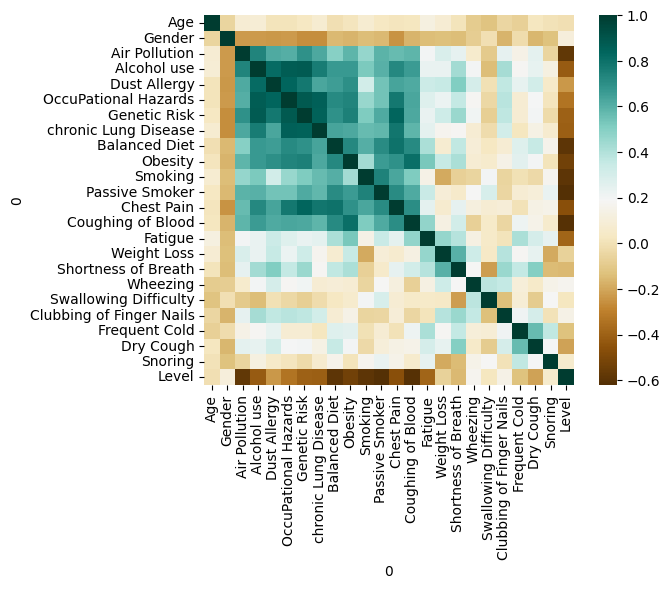

<Figure size 3000x2400 with 0 Axes>

In [17]:
sns.heatmap(df.corr(), square = True, cmap = 'BrBG')
plt.figure(figsize=(30,24))

##Step 2: Feature Selection & Feature Elimination

**First we find Accuracy without Feature Elimination**

In [18]:
df_corr = pd.DataFrame({
    'Column1' : [],
    'Column2' : [],
    'Correlation between two' : []
})

In [19]:
## Now, we finding correlation between each columns to find which features are highly correlated
li = []
for col1 in df.columns:
    max1 = 0
    column1 = ''
    column2 = ''
    df_temp = []
    for col2 in df.columns:
        if col1!=col2:
            corr1 = df[col1].corr(df[col2])
            if corr1 > max1:
                max1 = corr1
                df_temp = { 
                      'column1' : col1,
                      'column2' : col2,
                      'correlation between two'  :  corr1
                }
    li.append(df_temp)
df1 = pd.DataFrame(li)
df1 = df1.sort_values(by = ['correlation between two'], ascending = False)
df1

,column1,column2,correlation between two
5,OccuPational Hazards,Genetic Risk,0.885225
6,Genetic Risk,OccuPational Hazards,0.885225
3,Alcohol use,Genetic Risk,0.876886
7,chronic Lung Disease,OccuPational Hazards,0.857867
12,Chest Pain,Genetic Risk,0.836802
4,Dust Allergy,OccuPational Hazards,0.835541
13,Coughing of Blood,Obesity,0.809561
9,Obesity,Coughing of Blood,0.809561
8,Balanced Diet,Chest Pain,0.796517
11,Passive Smoker,Smoking,0.743586


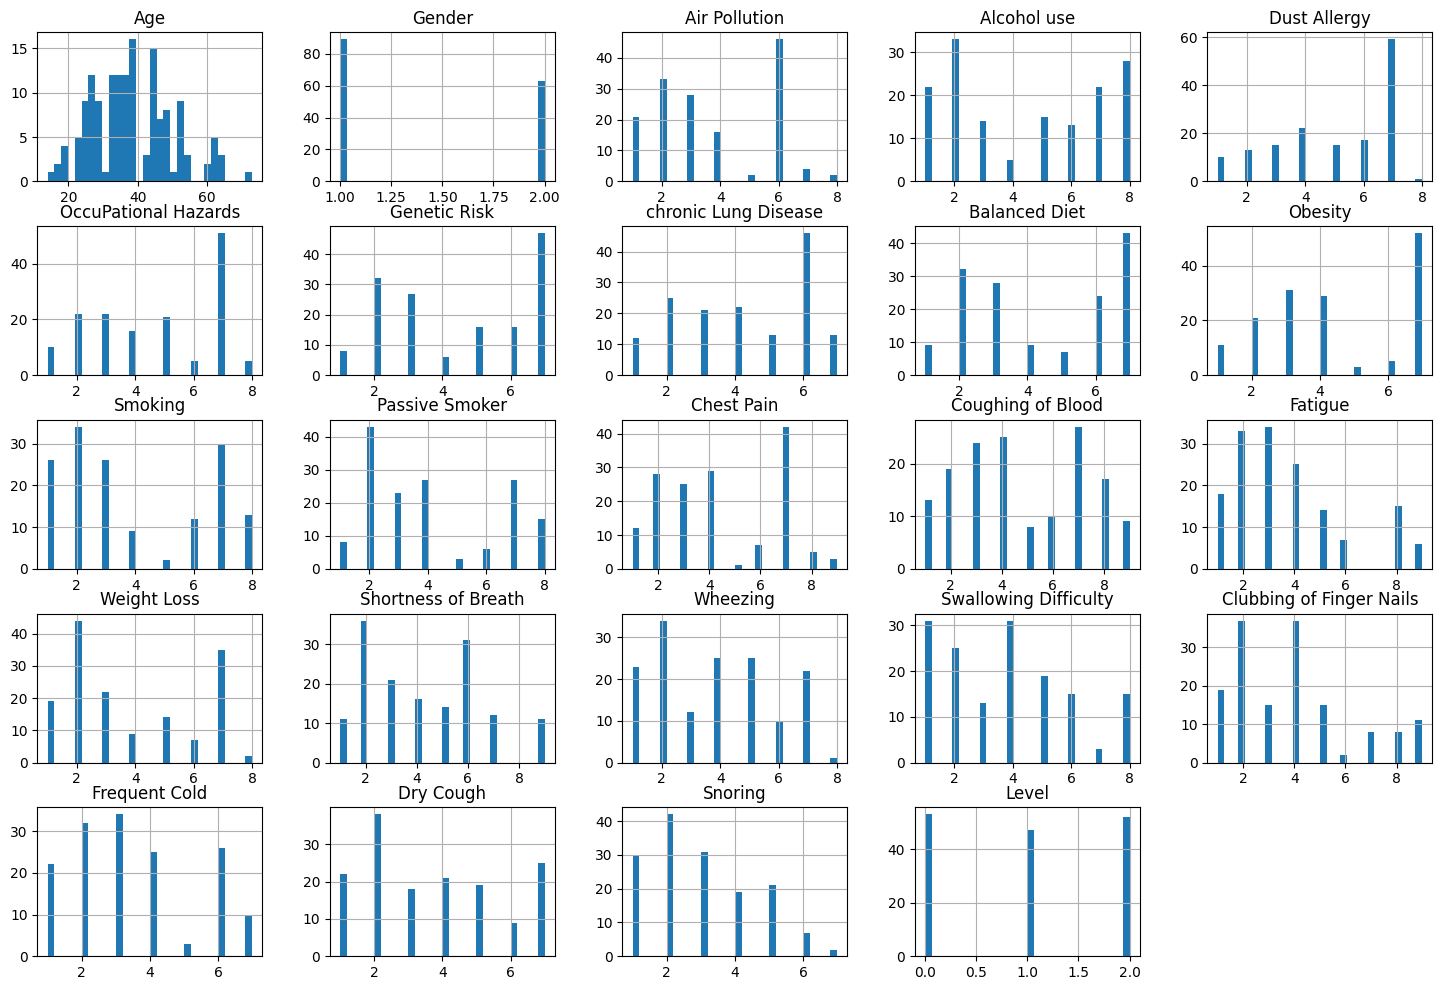

In [20]:
df.hist(bins=30, figsize=(18,12))
plt.show()

**Spliting the dataset into training and testing**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [26]:
X_train.shape

(121, 23)

**Feature Scaling of dataset**

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Training the model using LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
ACC_LR = accuracy_score(y_test, y_pred)
print(ACC_LR)

[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 12]]
1.0


In [31]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [32]:
import sklearn.metrics as metrics

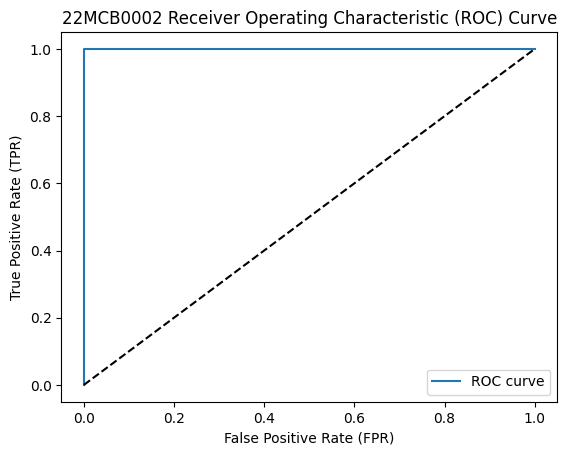

In [33]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('22MCB0002 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score,recall_score,precision_recall_fscore_support


# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_NB = nb.predict(X_test)

# Evaluate the model's performance
cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
ACC_NB = accuracy_score(y_test, y_pred_NB)
print(ACC_NB)

report = classification_report(y_test, y_pred_NB)
print(report)

[[ 8  0  1]
 [ 0 10  0]
 [ 2  0 10]]
0.9032258064516129
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       1.00      1.00      1.00        10
           2       0.91      0.83      0.87        12

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



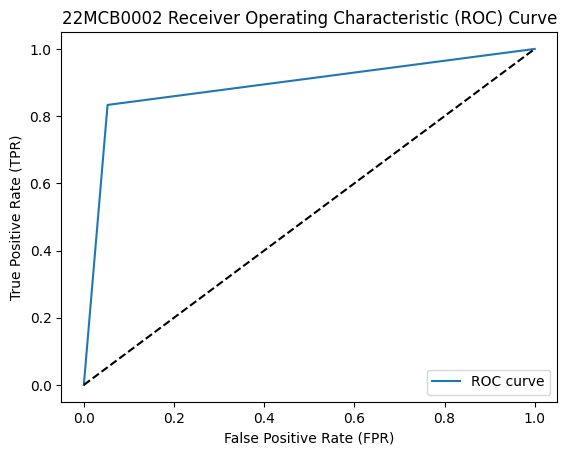

In [36]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred_NB == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('22MCB0002 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##DecisionTree

In [39]:
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score,recall_score,precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=52)

# Train the model
dt.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_DT = dt.predict(X_test)


# Evaluate the model's performance
cm = confusion_matrix(y_test, y_pred_DT)
print(cm)
ACC_DT = accuracy_score(y_test, y_pred_DT)
print(ACC_DT)

report = classification_report(y_test, y_pred_DT)
print(report)


[[ 9  0  0]
 [ 0 10  0]
 [ 0  0 12]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        12

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



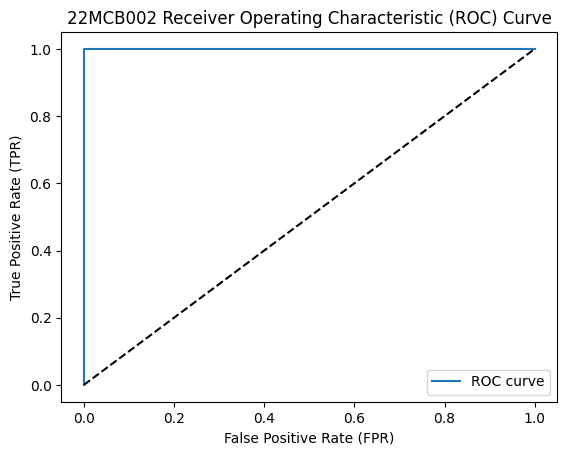

In [40]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred_DT == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('22MCB002 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Accuracy Comparison**

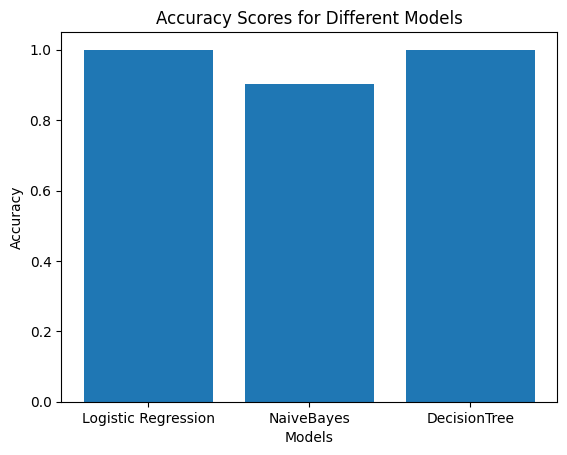

In [41]:
model_names = ['Logistic Regression', 'NaiveBayes', 'DecisionTree']
accuracy_scores = [ACC_LR,ACC_NB,ACC_DT]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.bar(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()

**Now, we Apply PCA**

In [42]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
df.shape

(152, 24)

In [43]:
# Separate the feature matrix (X) and the target variable (y)
X = df.iloc[: , :23]
y = df.iloc[:,-1]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=52)

In [50]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Logistic Regression**

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
y_pred = lr.predict(X_test_pca)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
ACC_LR_PCA = accuracy_score(y_test, y_pred)
print(ACC_LR_PCA)

[[12  0  0]
 [ 0 11  0]
 [ 0  0  8]]
1.0


In [55]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         8

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



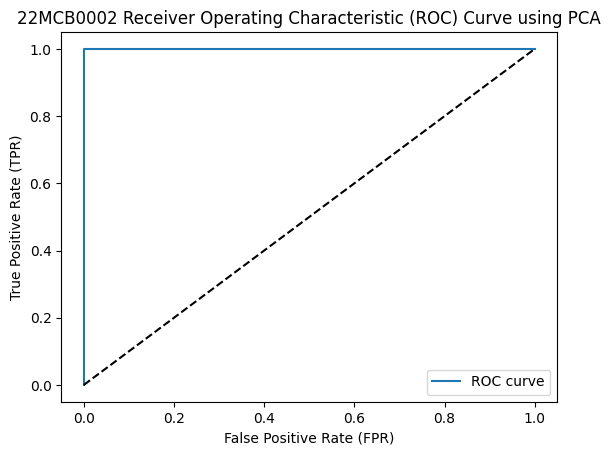

In [56]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('22MCB0002 Receiver Operating Characteristic (ROC) Curve using PCA')
plt.legend(loc='lower right')
plt.show()


**Naive Bayes**

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score,recall_score,precision_recall_fscore_support


# Create a Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred_NB = nb.predict(X_test_pca)

# Evaluate the model's performance
cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
ACC_NB_PCA = accuracy_score(y_test, y_pred_NB)
print(ACC_NB_PCA)

report = classification_report(y_test, y_pred_NB)
print(report)

[[11  0  1]
 [ 0 11  0]
 [ 0  0  8]]
0.967741935483871
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        11
           2       0.89      1.00      0.94         8

    accuracy                           0.97        31
   macro avg       0.96      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31



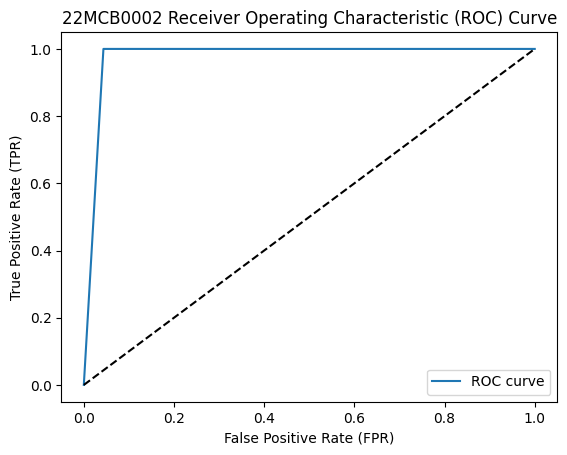

In [61]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred_NB == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('22MCB0002 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Decision Tree Classifier**

In [63]:
from sklearn.metrics import accuracy_score, classification_report,mean_absolute_error, mean_squared_error, r2_score,f1_score,precision_score,recall_score,precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=52)

# Train the model
dt.fit(X_train_pca, y_train)

# Make predictions on the testing set
y_pred_DT = dt.predict(X_test_pca)


# Evaluate the model's performance
cm = confusion_matrix(y_test, y_pred_DT)
print(cm)
ACC_DT_PCA = accuracy_score(y_test, y_pred_DT)
print(ACC_DT_PCA)

report = classification_report(y_test, y_pred_DT)
print(report)


[[11  0  1]
 [ 0 11  0]
 [ 0  0  8]]
0.967741935483871
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       1.00      1.00      1.00        11
           2       0.89      1.00      0.94         8

    accuracy                           0.97        31
   macro avg       0.96      0.97      0.97        31
weighted avg       0.97      0.97      0.97        31



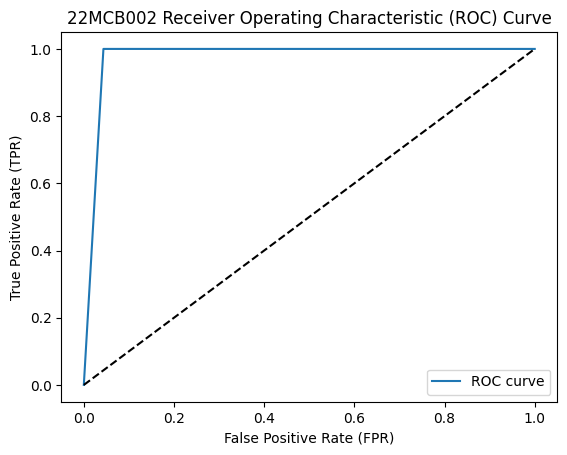

In [64]:
# Binarize the true labels
y_test_bin = np.where(y_test == 2, 1, 0)

# Compute the probabilities for positive class
y_scores = np.where(y_pred_DT == 2, 1, 0)

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = metrics.roc_curve(y_test_bin, y_scores)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('22MCB002 Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**Accuracy Comparison (PCA)**

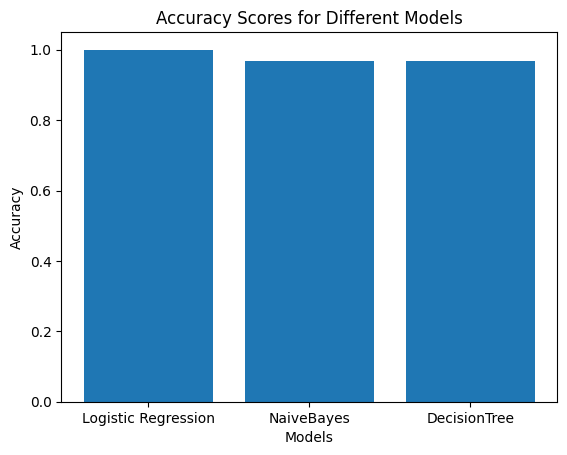

In [65]:
model_names = ['Logistic Regression', 'NaiveBayes', 'DecisionTree']
accuracy_scores = [ACC_LR_PCA,ACC_NB_PCA,ACC_DT_PCA]

# Set the x-axis positions for the bars
x = range(len(model_names))

# Create a bar plot
plt.bar(x, accuracy_scores)

# Add x-axis labels, y-axis label, and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')

# Add model names as x-axis tick labels
plt.xticks(x, model_names)

# Display the plot
plt.show()